## **1. Import libraries**

In [2]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [68]:
df = pd.read_csv('Diabetes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df[df.pIC50.notna()]

In [69]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [71]:
# Examine X dimension
X.shape

(2064, 881)

In [72]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2064, 170)

In [73]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
Y_train

322    5.98
1332   4.52
266    4.30
619    6.96
1488   7.59
       ... 
1638   7.89
1095   7.42
1130   5.65
1294   5.20
860    8.52
Name: pIC50, Length: 1651, dtype: float64

## **4. Compare ML algorithms**

In [76]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████████████████████████████████████▉ | 41/42 [00:10<00:00,  4.74it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1651, number of used features: 170
[LightGBM] [Info] Start training from score 6.432341


100%|███████████████████████████████████████████| 42/42 [00:11<00:00,  3.59it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 95%|████████████████████████████████████████▉  | 40/42 [00:10<00:00,  5.96it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1651, number of used features: 170
[LightGBM] [Info] Start training from score 6.432341


100%|███████████████████████████████████████████| 42/42 [00:11<00:00,  3.78it/s]


In [77]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.77,0.79,0.56,0.02
ExtraTreeRegressor,0.77,0.79,0.56,0.03
ExtraTreesRegressor,0.77,0.79,0.56,1.15
GaussianProcessRegressor,0.77,0.79,0.56,0.32
XGBRegressor,0.76,0.78,0.58,0.32
RandomForestRegressor,0.73,0.76,0.61,0.87
BaggingRegressor,0.71,0.74,0.63,0.10
MLPRegressor,0.66,0.69,0.69,0.90
HistGradientBoostingRegressor,0.64,0.68,0.70,0.64


In [78]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.13,0.49,0.91,0.40
SVR,0.09,0.47,0.92,0.27
NuSVR,0.09,0.47,0.93,0.22
LGBMRegressor,0.09,0.47,0.93,0.70
KNeighborsRegressor,0.06,0.45,0.94,0.04
HistGradientBoostingRegressor,0.06,0.45,0.94,0.61
LassoCV,0.03,0.43,0.96,1.72
ElasticNetCV,0.03,0.43,0.96,1.62
RandomForestRegressor,0.03,0.43,0.96,0.88


## **5. Data visualization of model performance**

[(0.0, 1.0)]

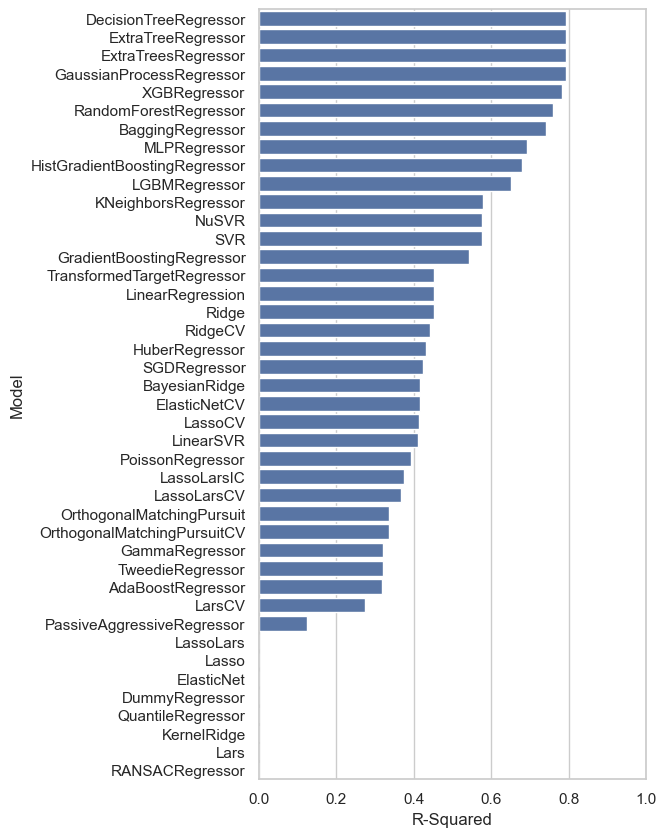

In [80]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

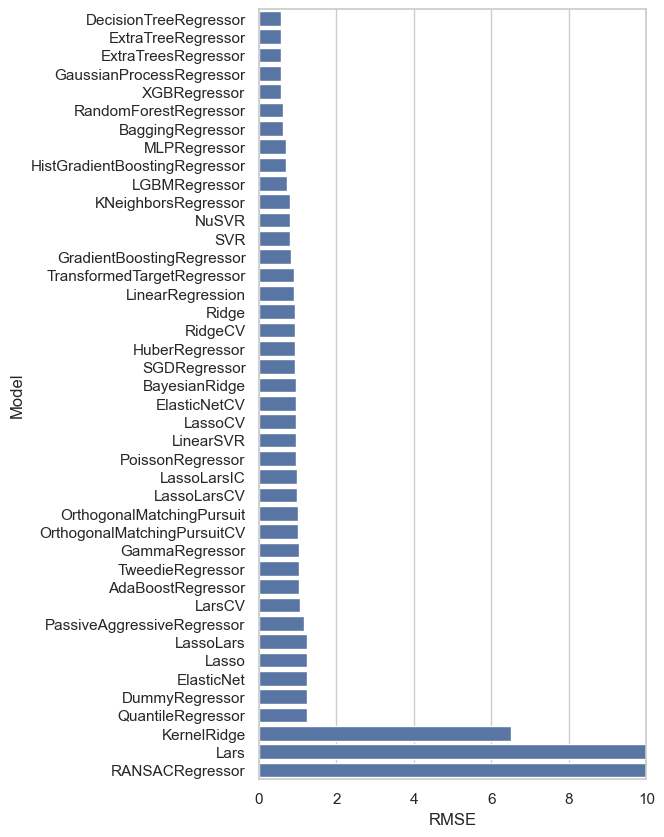

In [81]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

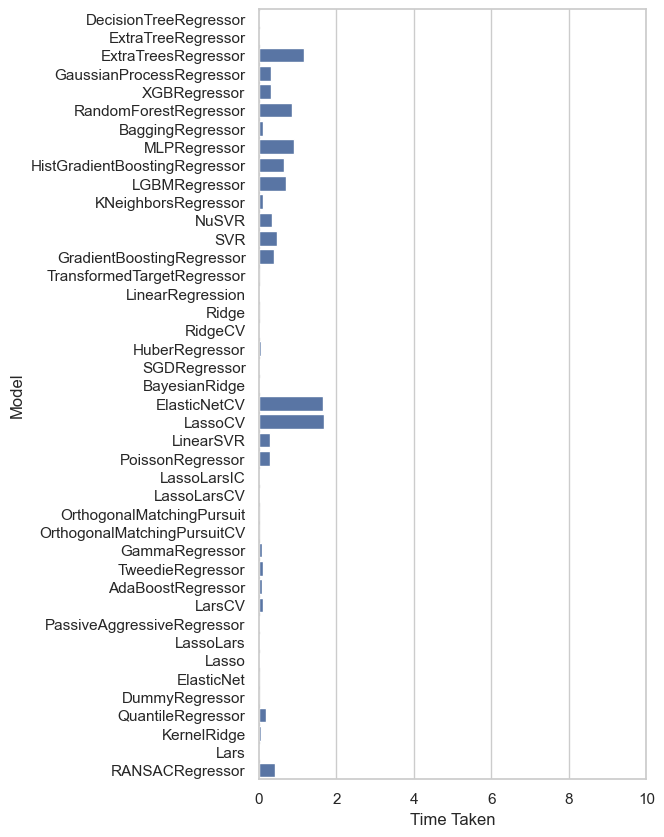

In [82]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))